# Prédiction des défauts de remboursement des prêts



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
loan_data = pd.read_csv('/Users/jl/Downloads/Default_Fin.csv')
loan_data.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [3]:
loan_data.shape

(10000, 5)

In [4]:
loan_data.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [5]:
loan_data[loan_data.duplicated()]

,Index,Employed,Bank Balance,Annual Salary,Defaulted?


In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [7]:
loan_data.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


In [8]:
loan_data.corr()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
Index,1.000000,-0.002597,0.010342,-0.001427,-0.005135
Employed,-0.002597,1.000000,-0.203578,0.753985,-0.035420
Bank Balance,0.010342,-0.203578,1.000000,-0.152243,0.350119
Annual Salary,-0.001427,0.753985,-0.152243,1.000000,-0.019871
Defaulted?,-0.005135,-0.035420,0.350119,-0.019871,1.000000


# Data Preprocessing

In [9]:
loan_data.drop('Index',axis=1,inplace=True)

# Data Visualization

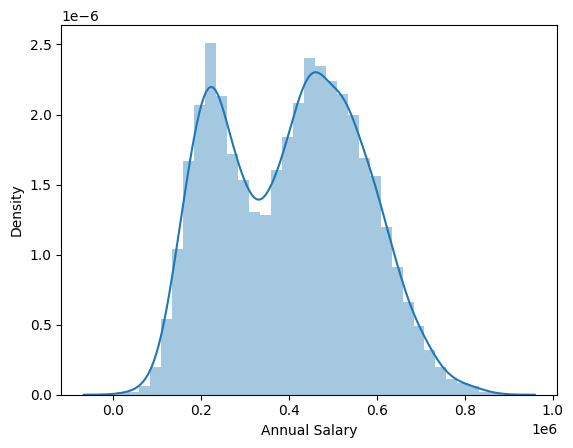

In [43]:
sns.distplot(loan_data['Annual Salary']);

<Axes: >

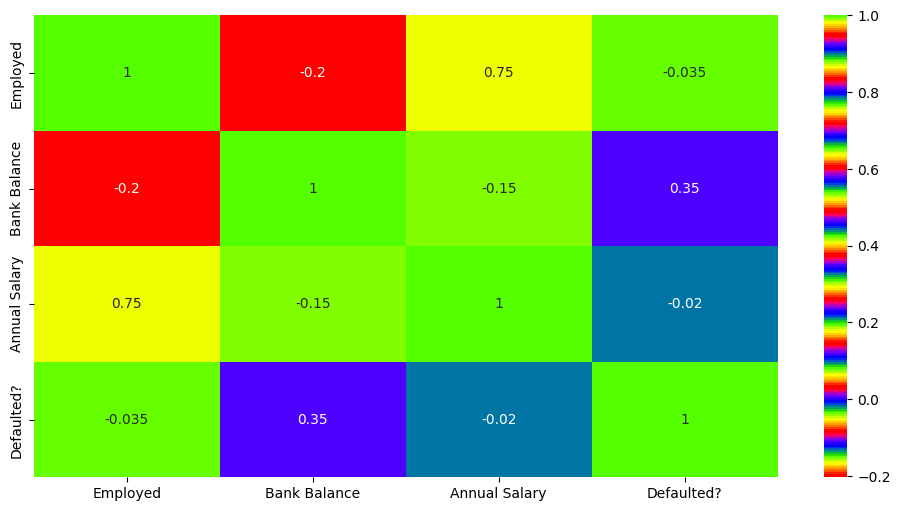

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(loan_data.corr(),annot=True,cmap='prism')

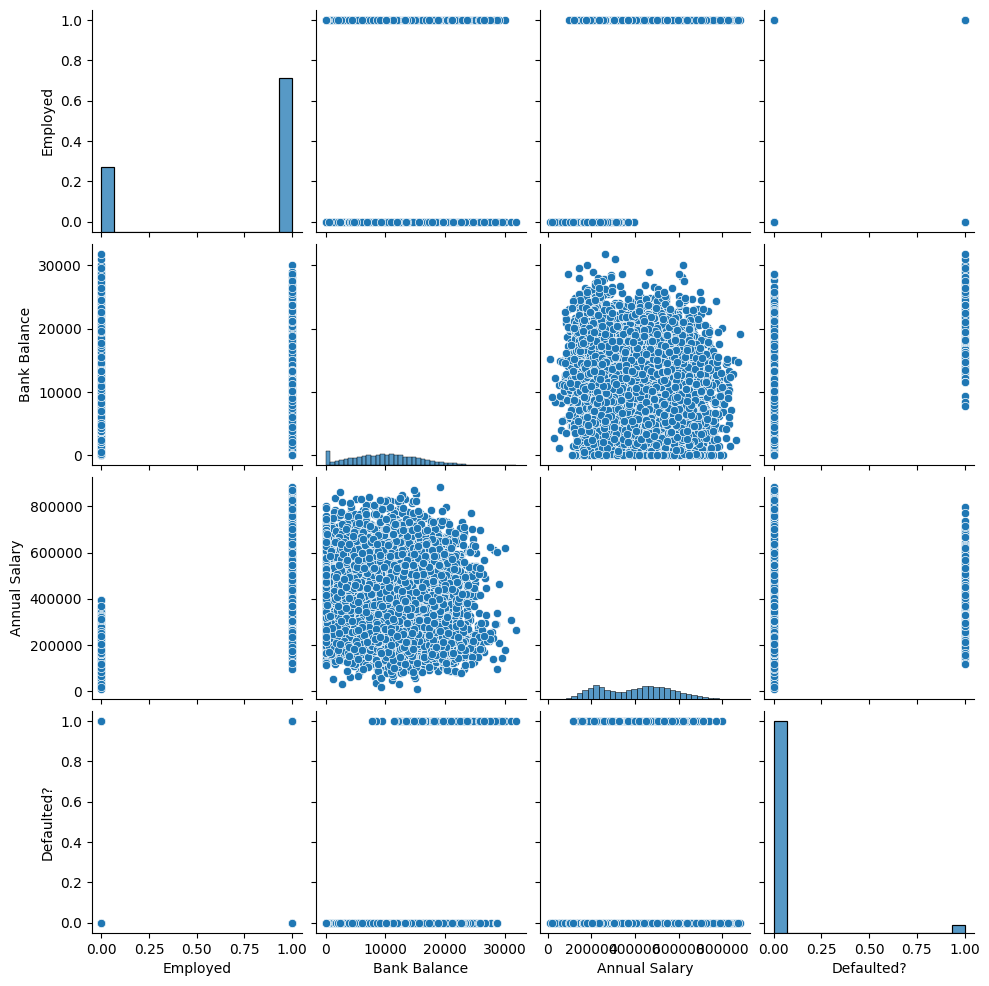

In [12]:
sns.pairplot(loan_data)

# Division du dataset en train & test

In [13]:
X = loan_data.drop('Defaulted?',axis=1)
y = loan_data['Defaulted?']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=101)

In [15]:
model_accuracies = {}

# Logistic Regression Model

In [16]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

# Model Predictions and Evaluation

In [17]:
predictions = model.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
model_accuracies['LR'] = accuracy_score(y_test,predictions)

0.9682857142857143
[[3389    1]
 [ 110    0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3390
           1       0.00      0.00      0.00       110

    accuracy                           0.97      3500
   macro avg       0.48      0.50      0.49      3500
weighted avg       0.94      0.97      0.95      3500



# Decision Tree Classifier

In [19]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

# Decision Tree Classifier Predictions and Evaluation

In [20]:
pred = dtree.predict(X_test)
pred

array([0, 1, 0, ..., 0, 0, 0])

In [21]:
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
model_accuracies['DT'] = accuracy_score(y_test,pred)

0.9565714285714285
[[3312   78]
 [  74   36]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3390
           1       0.32      0.33      0.32       110

    accuracy                           0.96      3500
   macro avg       0.65      0.65      0.65      3500
weighted avg       0.96      0.96      0.96      3500



# Random Forests Classifier

In [22]:
rfc = RandomForestClassifier(n_estimators=120,n_jobs=4,verbose=4,random_state=101)
rfc.fit(X_train,y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.2s


building tree 1 of 120building tree 2 of 120

building tree 3 of 120
building tree 4 of 120
building tree 5 of 120
building tree 6 of 120
building tree 7 of 120
building tree 8 of 120
building tree 9 of 120
building tree 10 of 120
building tree 11 of 120
building tree 12 of 120
building tree 13 of 120
building tree 14 of 120
building tree 15 of 120
building tree 16 of 120
building tree 17 of 120
building tree 18 of 120
building tree 19 of 120
building tree 20 of 120
building tree 21 of 120
building tree 22 of 120
building tree 23 of 120
building tree 24 of 120
building tree 25 of 120
building tree 26 of 120
building tree 27 of 120
building tree 28 of 120
building tree 29 of 120
building tree 30 of 120
building tree 31 of 120
building tree 32 of 120
building tree 33 of 120
building tree 34 of 120
building tree 35 of 120
building tree 36 of 120
building tree 37 of 120
building tree 38 of 120
building tree 39 of 120
building tree 40 of 120
building tree 41 of 120
building tree 42 of 120
b

[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:    0.2s finished


RandomForestClassifier(n_estimators=120, n_jobs=4, random_state=101, verbose=4)

# Prédictions et évaluation du modèle de classification des Random Forests

In [23]:
rfc_pred = rfc.predict(X_test)
rfc_pred

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:    0.0s finished


array([0, 1, 0, ..., 0, 0, 0])

In [24]:
print(accuracy_score(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))
model_accuracies['RFC'] = accuracy_score(y_test,rfc_pred)

0.972
[[3366   24]
 [  74   36]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3390
           1       0.60      0.33      0.42       110

    accuracy                           0.97      3500
   macro avg       0.79      0.66      0.70      3500
weighted avg       0.97      0.97      0.97      3500



# Support Vector Classifier

In [25]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

# SVM Model Predictions and Evaluation

In [26]:
svm_pred = svm.predict(X_test)
svm_pred

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
print(accuracy_score(y_test,svm_pred))
print(confusion_matrix(y_test,svm_pred))
print(classification_report(y_test,svm_pred))
model_accuracies['SVM'] = accuracy_score(y_test,svm_pred)

0.9685714285714285
[[3390    0]
 [ 110    0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3390
           1       0.00      0.00      0.00       110

    accuracy                           0.97      3500
   macro avg       0.48      0.50      0.49      3500
weighted avg       0.94      0.97      0.95      3500



# Optimisation des SVM par réglage des hyperparamètres (Hyperparameter Tuning) via GridSearchCV

In [28]:
param_grid = {'C': [0.1,1,10,100,1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [29]:
grid_search = GridSearchCV(SVC(),param_grid,verbose=3,refit=True)

In [30]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.966 total time=   1.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.966 total time=   1.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.965 total time=   1.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.965 total time=   1.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.965 total time=   1.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.966 total time=   1.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.966 total time=   1.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.965 total time=   1.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.965 total time=   1.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.965 total time=   1.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.966 total time=   1.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [31]:
grid_search.best_estimator_

SVC(C=0.1, gamma=1)

In [32]:
grid_search.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [33]:
grid_search.best_score_

0.9656923076923076

# Prédiction à l'aide du modèle SVM optimisé

In [34]:
pred_opsvm = grid_search.predict(X_test)
pred_opsvm

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
print(accuracy_score(y_test,pred_opsvm))
print(confusion_matrix(y_test,pred_opsvm))
print(classification_report(y_test,pred_opsvm))
model_accuracies['Optimized SVM'] = accuracy_score(y_test,pred_opsvm)

0.9685714285714285
[[3390    0]
 [ 110    0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3390
           1       0.00      0.00      0.00       110

    accuracy                           0.97      3500
   macro avg       0.48      0.50      0.49      3500
weighted avg       0.94      0.97      0.95      3500



# K Nearest Neighbors

In [36]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

# Prédiction KNN et évaluation

In [37]:
knn_pred = knn.predict(X_test)
knn_pred

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
print(accuracy_score(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))
model_accuracies['KNN'] = accuracy_score(y_test,knn_pred)

0.9702857142857143
[[3380   10]
 [  94   16]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3390
           1       0.62      0.15      0.24       110

    accuracy                           0.97      3500
   macro avg       0.79      0.57      0.61      3500
weighted avg       0.96      0.97      0.96      3500



# Classificateur Gaussien Naive Bayes

In [39]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

# Predictions & Evaluation

In [40]:
gnb_pred = gnb.predict(X_test)
gnb_pred

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
print(accuracy_score(y_test,gnb_pred))
print(confusion_matrix(y_test,gnb_pred))
print(classification_report(y_test,gnb_pred))
model_accuracies['GNB'] = accuracy_score(y_test,gnb_pred)

0.9737142857142858
[[3378   12]
 [  80   30]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3390
           1       0.71      0.27      0.39       110

    accuracy                           0.97      3500
   macro avg       0.85      0.63      0.69      3500
weighted avg       0.97      0.97      0.97      3500



# Conclusion

In [42]:
print("Performance of ML Algorithms:")
print('Logistic Regression:',str(np.round(model_accuracies['LR']*100,2)) + '%')
print('Decision Tree Classifier:',str(np.round(model_accuracies['DT']*100,2)) + '%')
print('Random Forests Classifier:',str(np.round(model_accuracies['RFC']*100,2)) + '%')
print('K Nearest Neighbors:',str(np.round(model_accuracies['KNN']*100,2)) + '%')
print('Support Vector Machines:',str(np.round(model_accuracies['SVM']*100,2)) + '%')
print('Optimized SVM:',str(np.round(model_accuracies['Optimized SVM']*100,2)) + '%')
print('Gaussian Naive Bayes:',str(np.round(model_accuracies['GNB']*100,2)) + '%')

Performance of ML Algorithms:
Logistic Regression: 96.83%
Decision Tree Classifier: 95.66%
Random Forests Classifier: 97.2%
K Nearest Neighbors: 97.03%
Support Vector Machines: 96.86%
Optimized SVM: 96.86%
Gaussian Naive Bayes: 97.37%


Le modèle Gaussian Naive Bayes est le plus précis, suivi de près par les modèles Random Forests Classifier et K Nearest Neighbors, même si les autres modèles, tels que Support Vector Machines et Logistic Regression, sont un peu moins précis.